In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv("deliveries.csv")

In [ ]:
kohli_scores=data[data["batter"]=="V Kohli"]
kohli_scores

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
132,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,2,V Kohli,I Sharma,W Jaffer,0,0,0,NaN,0,NaN,NaN,NaN
133,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,3,V Kohli,I Sharma,W Jaffer,0,4,4,legbyes,0,NaN,NaN,NaN
134,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,4,V Kohli,I Sharma,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
137,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,2,1,V Kohli,AB Dinda,W Jaffer,0,0,0,NaN,0,NaN,NaN,NaN
138,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,2,2,V Kohli,AB Dinda,W Jaffer,0,0,0,NaN,1,V Kohli,bowled,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260280,1426310,1,Royal Challengers Bengaluru,Rajasthan Royals,6,1,V Kohli,R Ashwin,C Green,1,0,1,NaN,0,NaN,NaN,NaN
260282,1426310,1,Royal Challengers Bengaluru,Rajasthan Royals,6,3,V Kohli,R Ashwin,C Green,1,0,1,NaN,0,NaN,NaN,NaN
260286,1426310,1,Royal Challengers Bengaluru,Rajasthan Royals,6,7,V Kohli,R Ashwin,C Green,1,0,1,NaN,0,NaN,NaN,NaN
260287,1426310,1,Royal Challengers Bengaluru,Rajasthan Royals,7,1,V Kohli,YS Chahal,C Green,0,0,0,NaN,0,NaN,NaN,NaN


In [ ]:
kohli_matchwise_scores=kohli_scores.groupby("match_id")["batsman_runs"].sum().reset_index()
kohli_matchwise_scores.head(240)

,match_id,batsman_runs
0,335982,1
1,335985,23
2,335992,13
3,335996,12
4,335998,1
...,...,...
235,1426268,42
236,1426274,18
237,1426279,51
238,1426283,70


In [ ]:
total_runs=kohli_matchwise_scores["batsman_runs"].sum()
total_runs

8014

In [ ]:
subset_score=kohli_matchwise_scores.head(240)
subset_score

,match_id,batsman_runs
0,335982,1
1,335985,23
2,335992,13
3,335996,12
4,335998,1
...,...,...
235,1426268,42
236,1426274,18
237,1426279,51
238,1426283,70


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [ ]:
subset_score["match_number"]=range(len(subset_score))
subset_score.set_index("match_number",inplace=True)
subset_score

<ipython-input-9-97da9d41c779>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_score["match_number"]=range(len(subset_score))


,match_id,batsman_runs
match_number,,
0,335982,1
1,335985,23
2,335992,13
3,335996,12
4,335998,1
...,...,...
235,1426268,42
236,1426274,18
237,1426279,51


In [ ]:
model=ARIMA(subset_score["batsman_runs"],order=(1,1,1))
model_fit=model.fit()

In [ ]:
forecast=model_fit.forecast(steps=10)
forecast

,predicted_mean
240,44.189547
241,44.237982
242,44.239054
243,44.239078
244,44.239078
245,44.239078
246,44.239078
247,44.239078
248,44.239078
249,44.239078


In [ ]:
kohli_matchwise_scores.iloc[240:]

,match_id,batsman_runs
240,1426296,92
241,1426300,27
242,1426306,47
243,1426310,33


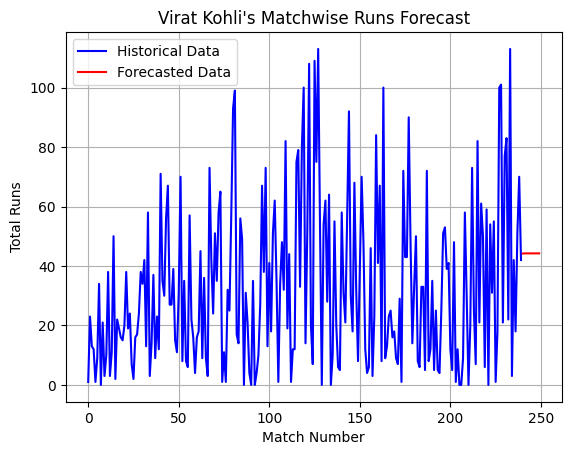

In [ ]:
plt.plot(subset_score["batsman_runs"], label="Historical Data", color="blue")

forecast_index = range(len(subset_score), len(subset_score) + len(forecast))
plt.plot(forecast_index, forecast, label="Forecasted Data", color="red")

plt.xlabel("Match Number")
plt.ylabel("Total Runs")
plt.title("Virat Kohli's Matchwise Runs Forecast")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
batsman_scores=data.groupby("batter")["batsman_runs"].sum().reset_index()
batsman_scores

,batter,batsman_runs
0,A Ashish Reddy,280
1,A Badoni,634
2,A Chandila,4
3,A Chopra,53
4,A Choudhary,25
...,...,...
668,Yashpal Singh,47
669,Younis Khan,3
670,Yudhvir Singh,22
671,Yuvraj Singh,2754


In [ ]:
batsman_scores=batsman_scores.sort_values(by="batsman_runs",ascending=False)
top_10_batsman=batsman_scores.head(10)
top_10_batsman

,batter,batsman_runs
631,V Kohli,8014
512,S Dhawan,6769
477,RG Sharma,6630
147,DA Warner,6567
546,SK Raina,5536
374,MS Dhoni,5243
30,AB de Villiers,5181
124,CH Gayle,4997
501,RV Uthappa,4954
282,KD Karthik,4843


In [ ]:
model=ARIMA(top_10_batsman["batsman_runs"],order=(1,1,1))
model_fit=model.fit()

batting_forecast=model_fit.forecast(steps=10)
print(batting_forecast)

10    4842.829538
11    4842.997889
12    4842.831623
13    4842.995829
14    4842.833657
15    4842.993821
16    4842.835641
17    4842.991862
18    4842.837575
19    4842.989951
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

p,d,q=1,1,1
P,D,Q,S=1,1,1,12
model=SARIMAX(top_10_batsman["batsman_runs"],order=(p,d,q),seasonal_order=(P,D,Q,S))
model_fit=model.fit(disp=False)
print(model_fit.summary())

predicted_values=model_fit.predict(start=len(top_10_batsman),end=len(top_10_batsman)+5, dynamic=False)
print(predicted_values)

# predicted_values=model_fit.predict(start=0,end=len(top_10_batsman)+9,dynamic=False)
# print(predicted_values)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting paramete

                                     SARIMAX Results                                      
Dep. Variable:                       batsman_runs   No. Observations:                   10
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   0.000
Date:                            Tue, 17 Dec 2024   AIC                             10.000
Time:                                    13:23:07   BIC                                nan
Sample:                                         0   HQIC                               nan
                                             - 10                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0         -0        nan        nan           0           0
ma.L1               0         -0   

/usr/local/lib/python3.10/dist-packages/statsmodels/tools/eval_measures.py:414: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + np.log(nobs) * df_modelwc
/usr/local/lib/python3.10/dist-packages/statsmodels/tools/eval_measures.py:439: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + 2 * np.log(np.log(nobs)) * df_modelwc
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3016: RuntimeWarning: divide by zero encountered in divide
  return self.params / self.bse
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3016: RuntimeWarning: invalid value encountered in divide
  return self.params / self.bse
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:472: RuntimeWarning: Mean of empty slice.
  xo = x - x.mean()
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


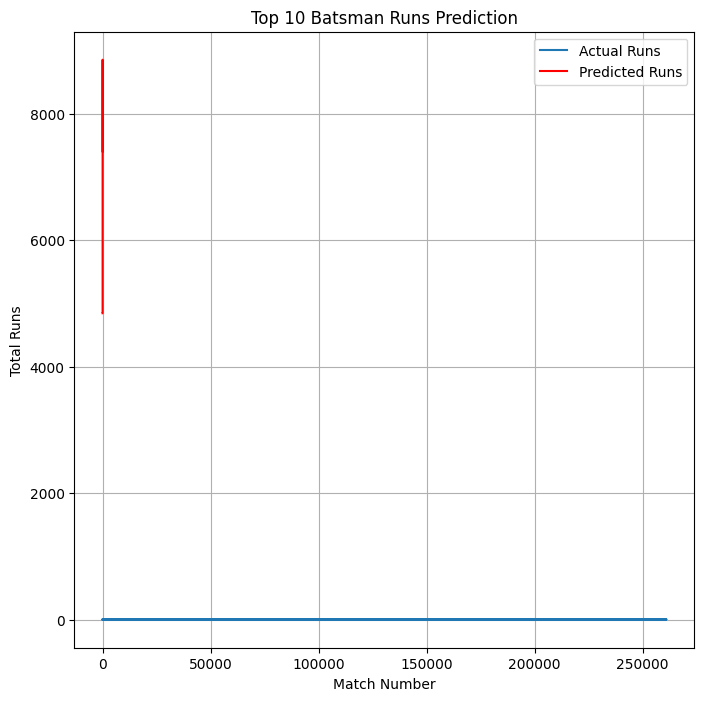

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(data.index,data["batsman_runs"],label="Actual Runs")
plt.plot(predicted_values.index,predicted_values,label="Predicted Runs", color="red")
plt.xlabel("Match Number")
plt.ylabel("Total Runs")
plt.title("Top 10 Batsman Runs Prediction")
plt.legend()
plt.grid(True)
plt.show()

**Bowler forcasting**

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [ ]:
bowler_data=data[['match_id','bowler','is_wicket','total_runs']]
bowler_data

,match_id,bowler,is_wicket,total_runs
0,335982,P Kumar,0,1
1,335982,P Kumar,0,0
2,335982,P Kumar,0,1
3,335982,P Kumar,0,0
4,335982,P Kumar,0,0
...,...,...,...,...
260915,1426312,AK Markram,0,1
260916,1426312,AK Markram,0,1
260917,1426312,Shahbaz Ahmed,0,1
260918,1426312,Shahbaz Ahmed,0,1


In [ ]:
performance = bowler_data.groupby(['match_id', 'bowler']).agg(
    wickets=('is_wicket', 'sum'),
    runs_conceded=('total_runs', 'sum')
).reset_index()
performance

,match_id,bowler,wickets,runs_conceded
0,335982,AA Noffke,1,41
1,335982,AB Agarkar,3,25
2,335982,AB Dinda,2,9
3,335982,CL White,0,24
4,335982,I Sharma,1,13
...,...,...,...,...
12973,1426312,PJ Cummins,1,18
12974,1426312,SP Narine,1,20
12975,1426312,Shahbaz Ahmed,1,28
12976,1426312,T Natarajan,0,29


In [ ]:
top_bowler = 'YS Chahal'
bowler_timeseries = performance[performance['bowler'] == top_bowler].set_index('match_id')['wickets']
print(bowler_timeseries)
bowler_timeseries = bowler_timeseries.sort_index()

match_id
598029     0
729281     1
729287     2
729299     1
729305     1
          ..
1426294    1
1426299    1
1426303    2
1426310    1
1426311    0
Name: wickets, Length: 159, dtype: int64


In [ ]:
model = ARIMA(bowler_timeseries, order=(2, 1, 2))
model_fit = model.fit()
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retv

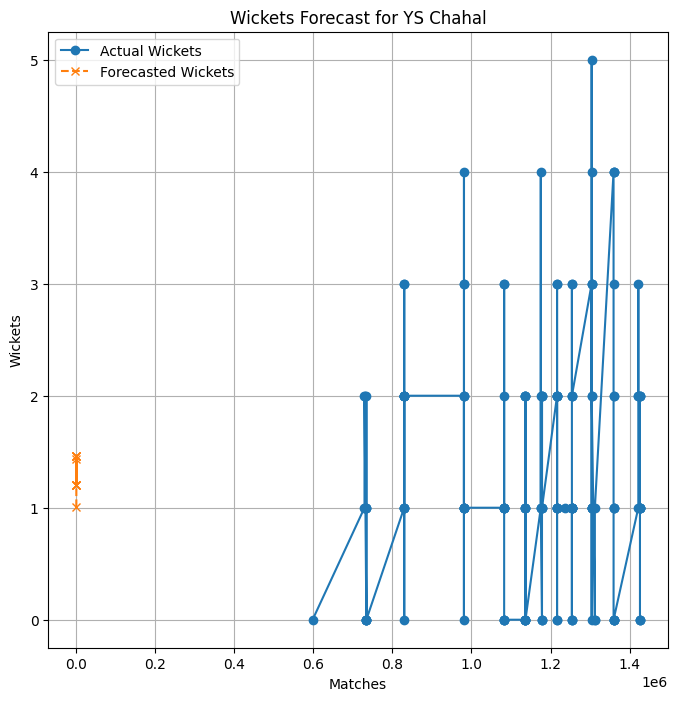

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(bowler_timeseries, label='Actual Wickets', marker='o')
plt.plot(range(len(bowler_timeseries), len(bowler_timeseries) + forecast_steps), forecast, label='Forecasted Wickets', marker='x', linestyle='--')
plt.title(f'Wickets Forecast for {top_bowler}')
plt.xlabel('Matches')
plt.ylabel('Wickets')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(f"Forecasted wickets for the next {forecast_steps} matches:")
print(forecast)

Forecasted wickets for the next 10 matches:
159    1.005454
160    1.437802
161    1.202628
162    1.464834
163    1.206342
164    1.465336
165    1.206418
166    1.465339
167    1.206425
168    1.465333
Name: predicted_mean, dtype: float64


**TOP 10 BEST BOWLERS**

In [ ]:
bowler_summary = performance.groupby('bowler').agg(
    total_wickets=('wickets', 'sum'),
    total_runs_conceded=('runs_conceded', 'sum'),
    matches_played=('match_id', 'nunique')
).reset_index()
bowler_summary

,bowler,total_wickets,total_runs_conceded,matches_played
0,A Ashish Reddy,19,400,20
1,A Badoni,2,37,5
2,A Chandila,11,245,12
3,A Choudhary,5,144,5
4,A Dananjaya,0,47,1
...,...,...,...,...
525,Yash Dayal,31,933,28
526,Yash Thakur,27,702,19
527,Yudhvir Singh,4,125,5
528,Yuvraj Singh,39,1091,73


In [ ]:
bowler_summary['average_runs_conceded'] = bowler_summary['total_runs_conceded'] / bowler_summary['matches_played']
bowler_summary['wickets_per_match'] = bowler_summary['total_wickets'] / bowler_summary['matches_played']
bowler_summary

,bowler,total_wickets,total_runs_conceded,matches_played,average_runs_conceded,wickets_per_match
0,A Ashish Reddy,19,400,20,20.000000,0.950000
1,A Badoni,2,37,5,7.400000,0.400000
2,A Chandila,11,245,12,20.416667,0.916667
3,A Choudhary,5,144,5,28.800000,1.000000
4,A Dananjaya,0,47,1,47.000000,0.000000
...,...,...,...,...,...,...
525,Yash Dayal,31,933,28,33.321429,1.107143
526,Yash Thakur,27,702,19,36.947368,1.421053
527,Yudhvir Singh,4,125,5,25.000000,0.800000
528,Yuvraj Singh,39,1091,73,14.945205,0.534247


In [ ]:
top_bowlers = bowler_summary.sort_values(by='total_wickets', ascending=False).head(10)
top_bowlers

,bowler,total_wickets,total_runs_conceded,matches_played,average_runs_conceded,wickets_per_match
524,YS Chahal,213,4681,159,29.440252,1.339623
119,DJ Bravo,207,4436,158,28.075949,1.310127
348,PP Chawla,201,5179,191,27.115183,1.052356
446,SP Narine,200,4672,175,26.697143,1.142857
355,R Ashwin,198,5435,208,26.129808,0.951923
71,B Kumar,195,5051,176,28.698864,1.107955
438,SL Malinga,188,3486,122,28.573770,1.540984
8,A Mishra,183,4193,162,25.882716,1.129630
193,JJ Bumrah,182,3840,133,28.872180,1.368421
373,RA Jadeja,169,4917,211,23.303318,0.800948


In [ ]:
model=ARIMA(top_bowlers["total_wickets"],order=(1,1,1))
model_fit=model.fit()

bowling_forecast=model_fit.forecast(steps=10)
print(bowling_forecast)

10    164.437552
11    159.875164
12    155.312837
13    150.750570
14    146.188364
15    141.626219
16    137.064133
17    132.502109
18    127.940144
19    123.378241
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

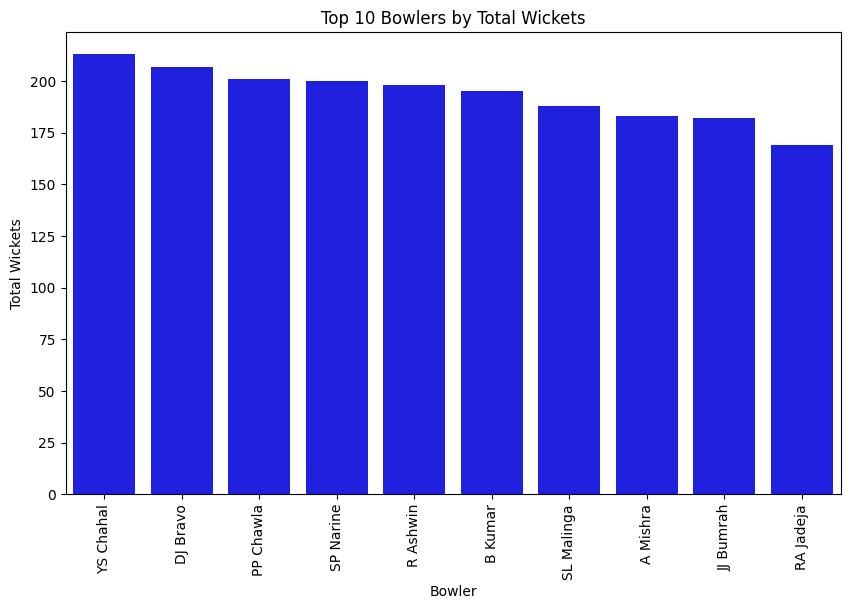

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='bowler', y='total_wickets', data=top_bowlers, color='blue')
plt.xlabel('Bowler')
plt.ylabel('Total Wickets')
plt.title('Top 10 Bowlers by Total Wickets')
plt.xticks(rotation=90)
plt.show()

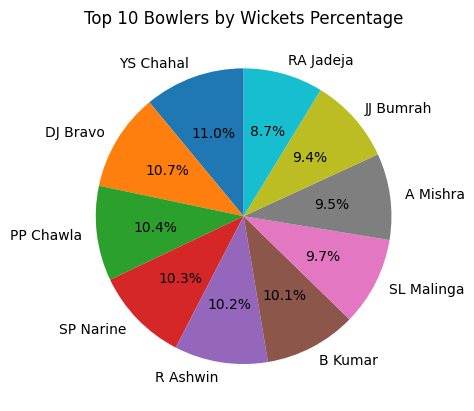

In [ ]:
plt.pie(top_bowlers['total_wickets'], labels=top_bowlers['bowler'], autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Bowlers by Wickets Percentage')
plt.show()